In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Baixar o tokenizer do NLTK
nltk.download('punkt')

# Exemplo de dataset com títulos ou textos de notícias
data = {
    'news': [
        "O mercado de ações caiu drasticamente hoje devido a uma crise financeira.",
        "O novo modelo do iPhone foi lançado com grandes melhorias na câmera.",
        "Jogos Olímpicos de Tóquio foram adiados devido à pandemia do COVID-19.",
        "A NASA lançou uma nova missão para estudar o solo de Marte.",
        "O time de futebol venceu o campeonato em uma final emocionante.",
        "O governo aprovou uma nova lei sobre tributação de empresas de tecnologia.",
        "A conferência anual de inteligência artificial atraiu milhares de especialistas.",
        "O novo estudo mostra os efeitos da mudança climática no Ártico.",
        "O presidente fez um discurso sobre a economia e políticas futuras.",
        "A indústria automobilística está adotando veículos elétricos como o futuro do transporte."
    ]
}

df = pd.DataFrame(data)

# Tokenizar as notícias
df['tokens'] = df['news'].apply(lambda x: word_tokenize(x.lower()))

# Treinar o modelo Word2Vec nas notícias tokenizadas
w2v_model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Função para converter uma notícia em um vetor médio de Word2Vec
def get_average_vector(tokens_list, model):
    vectors = [model.wv[word] for word in tokens_list if word in model.wv]
    if len(vectors) > 0:
        return sum(vectors) / len(vectors)
    else:
        return [0] * model.vector_size

# Criar vetores médios para as notícias
df['vector'] = df['tokens'].apply(lambda x: get_average_vector(x, w2v_model))

# Preparar os vetores para o K-Means
X = pd.DataFrame(df['vector'].to_list())

# Definir o número de clusters (por exemplo, 3 clusters)
num_clusters = 3



[nltk_data] Downloading package punkt to /home/alexmarino/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# Aplicar o K-Means para agrupar as notícias
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Visualizar os clusters formados
print(df[['news', 'cluster']])



                                                news  cluster
0  O mercado de ações caiu drasticamente hoje dev...        0
1  O novo modelo do iPhone foi lançado com grande...        1
2  Jogos Olímpicos de Tóquio foram adiados devido...        0
3  A NASA lançou uma nova missão para estudar o s...        0
4  O time de futebol venceu o campeonato em uma f...        0
5  O governo aprovou uma nova lei sobre tributaçã...        2
6  A conferência anual de inteligência artificial...        2
7  O novo estudo mostra os efeitos da mudança cli...        1
8  O presidente fez um discurso sobre a economia ...        1
9  A indústria automobilística está adotando veíc...        1


/home/alexmarino/miniconda3/envs/NLP/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


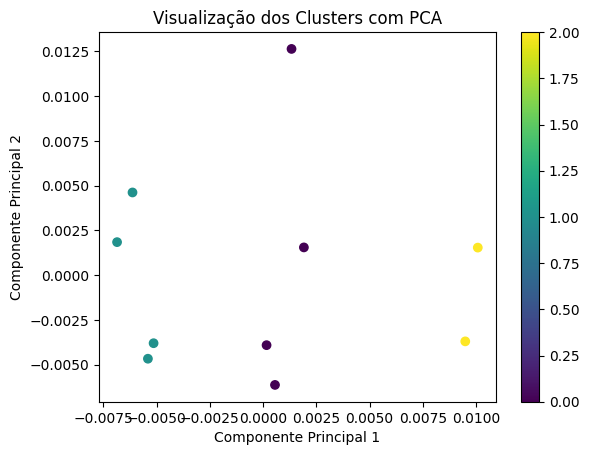

In [5]:
# Visualizar os clusters em 2D usando PCA para reduzir a dimensionalidade
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()
